In [1]:
import duckdb
import pandas as pd, h3
import matplotlib.pyplot as plt

In [2]:
con = duckdb.connect("ais.duckdb")

In [3]:
feb_df = con.execute("""
    SELECT * 
    FROM feb_ais
""").fetchdf()

print(feb_df.head(10))

            TIMESTAMP  MMSI  LATITUDE  LONGITUDE  SPEED  HEADING  COURSE
0 2023-02-04 00:00:07     0       NaN        NaN    NaN      NaN     NaN
1 2023-02-04 00:00:11     0       NaN        NaN    NaN      NaN     NaN
2 2023-02-04 00:00:27     0       NaN        NaN    NaN      NaN     NaN
3 2023-02-04 00:00:27     0       NaN        NaN    NaN      NaN     NaN
4 2023-02-04 00:00:37     0       NaN        NaN    NaN      NaN     NaN
5 2023-02-04 00:00:51     0       NaN        NaN    NaN      NaN     NaN
6 2023-02-04 00:00:52     0       NaN        NaN    NaN      NaN     NaN
7 2023-02-04 00:00:53     0       NaN        NaN    NaN      NaN     NaN
8 2023-02-04 00:00:53     0       NaN        NaN    NaN      NaN     NaN
9 2023-02-04 00:00:54     0       NaN        NaN    NaN      NaN     NaN


In [4]:
aug_df = con.execute("""
    SELECT * 
    FROM aug_ais
""").fetchdf()

print(aug_df.head(10))

            TIMESTAMP  MMSI  LATITUDE  LONGITUDE  SPEED  HEADING  COURSE
0 2023-08-01 00:00:04     0       NaN        NaN    NaN      NaN     NaN
1 2023-08-01 00:00:12     0       NaN        NaN    NaN      NaN     NaN
2 2023-08-01 00:00:21     0       NaN        NaN    NaN      NaN     NaN
3 2023-08-01 00:00:23     0       NaN        NaN    NaN      NaN     NaN
4 2023-08-01 00:00:23     0       NaN        NaN    NaN      NaN     NaN
5 2023-08-01 00:00:23     0       NaN        NaN    NaN      NaN     NaN
6 2023-08-01 00:00:26     0       NaN        NaN    NaN      NaN     NaN
7 2023-08-01 00:00:26     0       NaN        NaN    NaN      NaN     NaN
8 2023-08-01 00:00:30     0       NaN        NaN    NaN      NaN     NaN
9 2023-08-01 00:00:30     0       NaN        NaN    NaN      NaN     NaN


In [5]:
static_mmsi_df = con.execute("""
    SELECT * 
    FROM static_mmsi
""").fetchdf()

print(static_mmsi_df.head(10))

        MMSI  SHIP_AND_CARGO_TYPE  TO_BOW  TO_STERN  TO_PORT  TO_STARBOARD
0  235116537                   90     226        60       32            12
1  477848800                   80     282        51       33            27
2  525109013                   70     163        27       33            33
3  352001892                    0     277        55       35            23
4  538003428                   81     288        45       35            25
5  577042000                   99     300       400       50            50
6  636018827                   80     281        52       36            24
7  352001096                   89     290        43       32            28
8  431073000                   70     142       222       40            11
9  200042177                   70     511       511       63            63


In [6]:
print(feb_df.describe())
print(aug_df.describe())
print(static_mmsi_df.describe())

                        TIMESTAMP          MMSI      LATITUDE     LONGITUDE  \
count                   106232847  1.062328e+08  9.078406e+07  9.078406e+07   
mean   2023-02-15 00:32:39.233754  5.119641e+08  1.698033e+00  1.045129e+02   
min           2023-02-01 00:00:00  0.000000e+00  2.685333e-01  9.710000e+01   
25%           2023-02-08 02:47:04  5.250121e+08  1.227353e+00  1.037498e+02   
50%           2023-02-14 22:59:50  5.630292e+08  1.266365e+00  1.038419e+02   
75%           2023-02-22 00:55:35  5.646880e+08  1.297580e+00  1.039641e+02   
max           2023-02-28 23:59:59  1.069655e+09  7.633792e+00  1.198628e+02   
std                           NaN  1.046320e+08  1.273595e+00  3.015626e+00   

              SPEED       HEADING        COURSE  
count  9.043036e+07  9.043036e+07  9.043036e+07  
mean   4.464236e+00  2.649772e+02  1.862999e+02  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  8.300000e+01  8.550000e+01  
50%    3.000000e-01  2.560000e+02  1.9

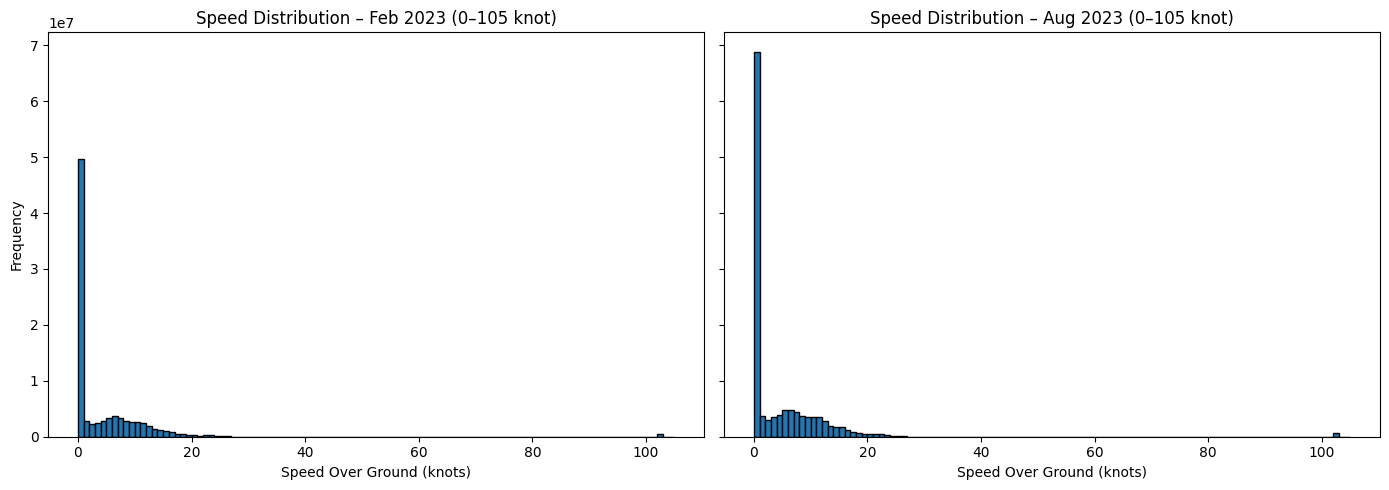

In [7]:
# speed
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# speed february histogram
axes[0].hist(feb_df["SPEED"], bins=105, range=(0, 105), edgecolor="black")
axes[0].set_xlabel("Speed Over Ground (knots)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Speed Distribution – Feb 2023 (0–105 knot)")

# speed august histogram
axes[1].hist(aug_df["SPEED"], bins=105, range=(0, 105), edgecolor="black")
axes[1].set_xlabel("Speed Over Ground (knots)")
axes[1].set_title("Speed Distribution – Aug 2023 (0–105 knot)")

plt.tight_layout()
plt.show()

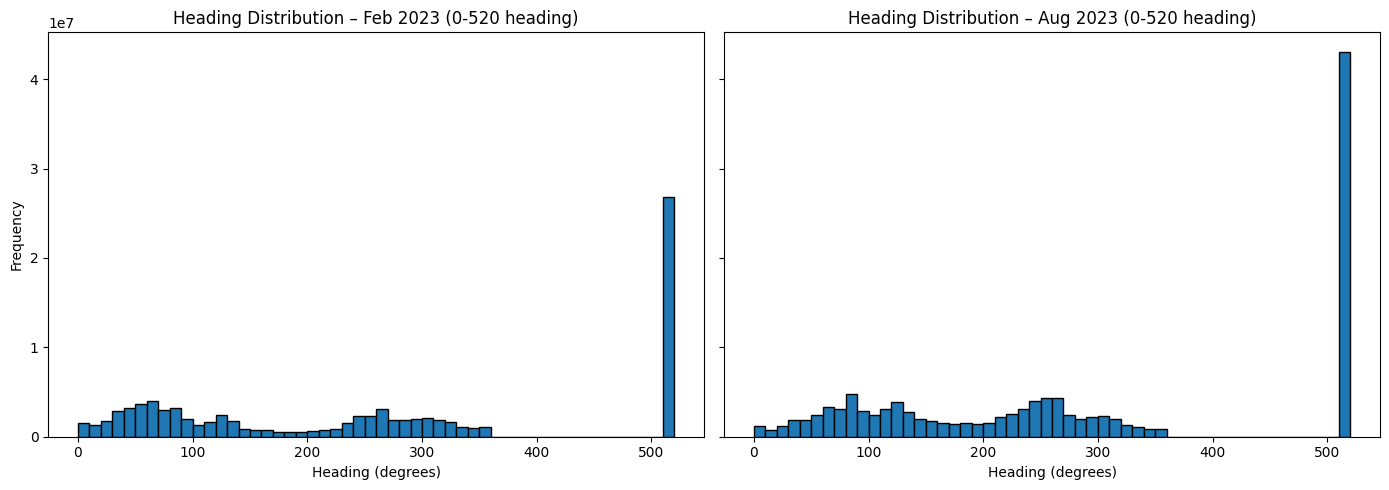

In [8]:
# heading
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# february heading histogram
axes[0].hist(feb_df["HEADING"], bins=52, range=(0, 520), edgecolor="black")
axes[0].set_xlabel("Heading (degrees)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Heading Distribution – Feb 2023 (0-520 heading)")

# august heading histogram
axes[1].hist(aug_df["HEADING"], bins=52, range=(0, 520), edgecolor="black")
axes[1].set_xlabel("Heading (degrees)")
axes[1].set_title("Heading Distribution – Aug 2023 (0-520 heading)")

plt.tight_layout()
plt.show()

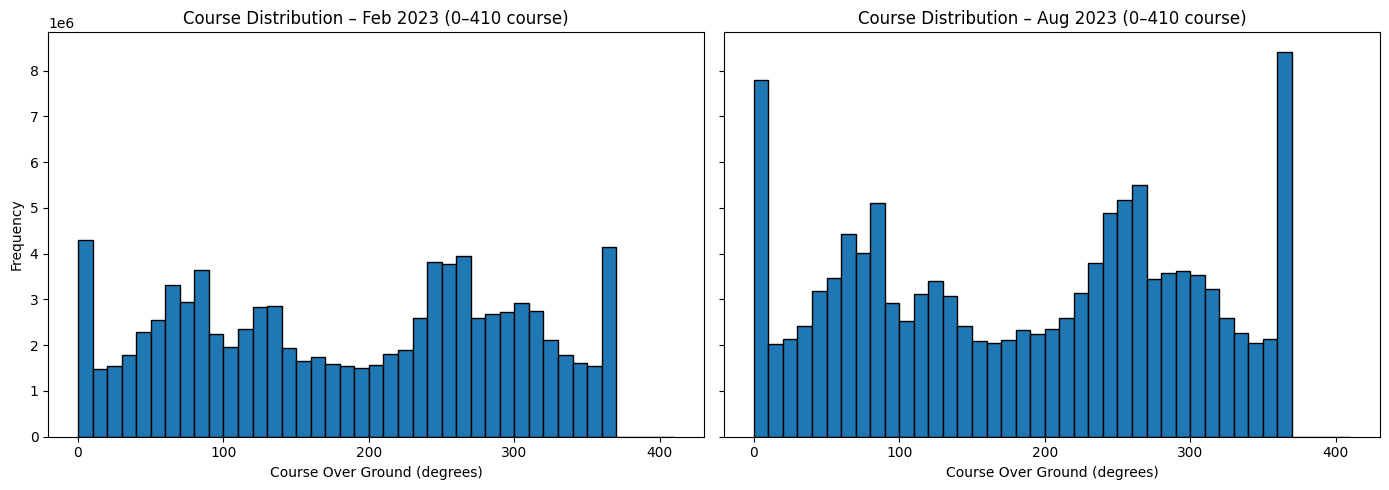

In [9]:
# course
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# february course histogram
axes[0].hist(feb_df["COURSE"], bins=41, range=(0, 410), edgecolor="black")
axes[0].set_xlabel("Course Over Ground (degrees)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Course Distribution – Feb 2023 (0–410 course)")

# august heading histogram
axes[1].hist(aug_df["COURSE"], bins=41, range=(0, 410), edgecolor="black")
axes[1].set_xlabel("Course Over Ground (degrees)")
axes[1].set_title("Course Distribution – Aug 2023 (0–410 course)")

plt.tight_layout()
plt.show()

In [10]:
def latlon_to_h3(lat, lon, res):
    if pd.isna(lat) or pd.isna(lon):
        return None
    if hasattr(h3, "latlng_to_cell"):
        return h3.latlng_to_cell(lat, lon, res)
    else:
        return h3.geo_to_h3(lat, lon, res)

In [ ]:
# convert lat/lon to H3
# RES = 8

# feb_df["h3"] = feb_df.apply(lambda r: latlon_to_h3(r["LATITUDE"], r["LONGITUDE"], RES), axis=1)
# aug_df["h3"] = feb_df.apply(lambda r: latlon_to_h3(r["LATITUDE"], r["LONGITUDE"], RES), axis=1)

In [ ]:
# define anchored flag, speed >= 0 && speed < 0.5
# feb_df["is_anchored"] = (feb_df["SPEED"] >= 0) & (feb_df["SPEED"] < 0.5)
# aug_df["is_anchored"] = (aug_df["SPEED"] >= 0) & (aug_df["SPEED"] < 0.5)

In [ ]:
# con.close()